Homework 2 feedback:
- instead of redoing 0 to x every time, could have integrated from 0.1 to 0.2 etc and then added it to the previous integral

Newton's method for two or more variables:
- have a vector of N equations of N variables
- need a gradient matrix of the partial derivatives
- still do a Taylor expansion

Finding minima and maxima:
- easy to do if you can take the analytic derivative because then you just set that to zero and apply the Newton method - this is called the Gauss-Newton method
    - need to be able to take the second derivative also
    - can use it for multiple variables/equations
- other method: golden ratio search
    - similar concept to bisection
    - have for unevenly spaced points and see which one is the smallest of the middle two
    - then the minima must be between the two points on either side of that point
    - then iterate to shrink the range
    - the optimum ratio between the intervals is on the slides - it's the golden ratio
    - see slides for algorithm steps in detail
    - only works for one variable and you have to know the bracket around the minima
- gradient descent
    - using a guess for the second derivative of a constant size
    - choice of gamma is important

Fourier transforms:
- use Fourier series
    - any periodic function can be expressed as a fourier series, which is an infinite sum of sine (or cosine) functions with different wavelengths and amplitudes weighted differently
    - expression on slides
    - can also do an alternative expression with complex variables and the e to the i formula - generally default to this
    - only works on periodic functions, but if it's not, can just take the range that you're interested in and replicate it
    - calculate the coefficients with a very complex integral
- discrete Fourier transform (DFT)
    - calculating the integrals numerically instead
    - expression on the slides
    - not an approximation but exact. it will go through all the sampled points up to rounding errors.
    - can also do the inverse DFT to get the points back
        - this is very important because then DFT can be used to encode a set of points
    - if the starting function is real, can eliminate half the coefficients because the other ones will just be the complex conjugates
    - example code on slides
    - second type of DFT: points are selected at the midpoints
- two dimensional version exists - used nested sums to get a 2D array of coefficients
- physical interpretation:
    - the coefficients tell us the relative contribution of each frequency
    - plotting the magnitude of the coefficients is called a power spectrum
    - can filter out high frequencies or low frequencies
    - can see signal vs noise in periodic behavior

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [12]:
spots=np.loadtxt('sunspots.txt', delimiter='\t')
#month,sun_spots=np.loadtxt('sunspots.txt',unpack=True) could also do this to automatically separate the columns

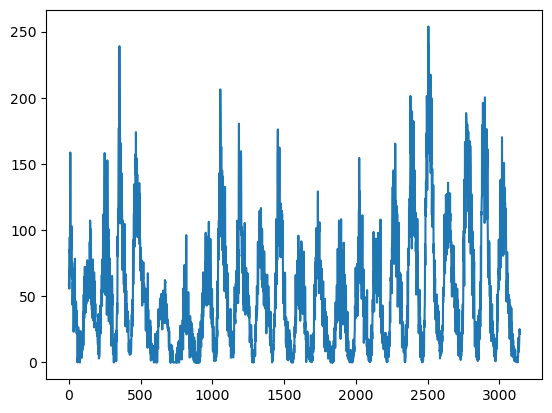

In [20]:
plt.plot(spots[:,0],spots[:,1])

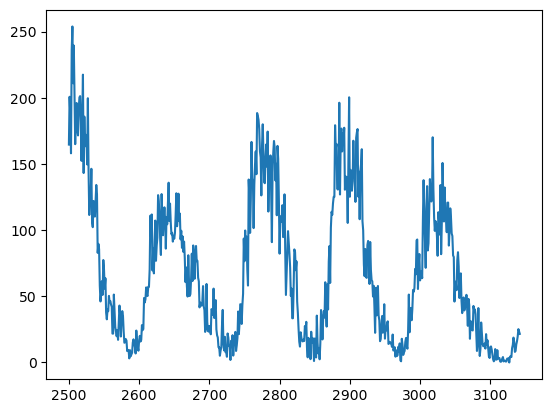

In [24]:
plt.plot(spots[2500:,0],spots[2500:,1])

In [26]:
#seems like the cycle is a little over 100 months long

In [30]:
def dft(y):
    N=len(y)
    c=np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N): #could replace the inner loop with np.sum()
            c[k]+=y[n]*cmath.exp(-2j*cmath.pi*k*n/N)
    return c

In [34]:
c=dft(spots[:,1])

In [36]:
conjugate=np.conjugate(c)

In [38]:
csquared=c*conjugate #could do this or c.real**2+c.imag**2 or abs(c)**2 since abs() on a complex number gives the modulus

In [42]:
csquared=np.real(csquared)

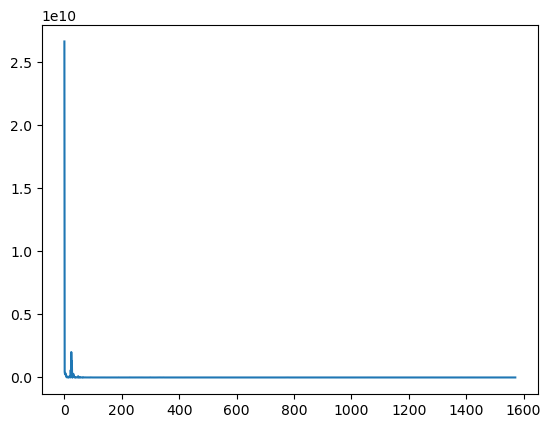

In [50]:
plt.plot(np.arange(csquared.size),csquared)

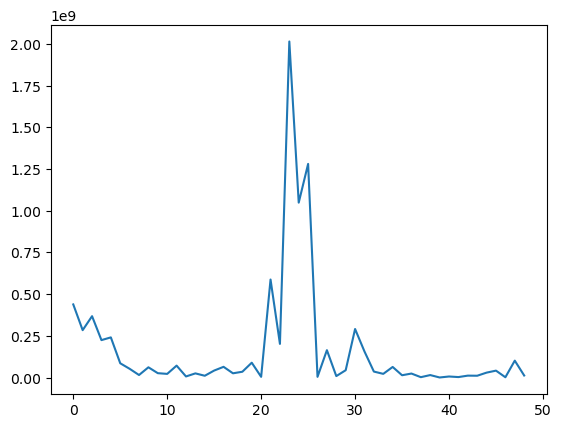

In [56]:
plt.plot(np.arange(49),csquared[1:50]) 
#getting rid of zero term since that's just the offset from zero of the mean of the original data
#also only plotting the first 50 terms since there aren't any spikes after that

In [63]:
np.argmax(csquared[1:50])

23

In [101]:
C23=np.zeros(c.size,complex)

In [103]:
C23[23]=c[23]

In [107]:
inverted=np.fft.ifft(C23)

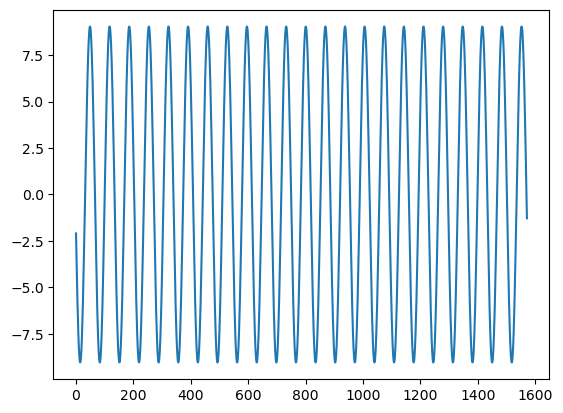

In [117]:
plt.plot(np.arange(inverted.size),inverted.real)

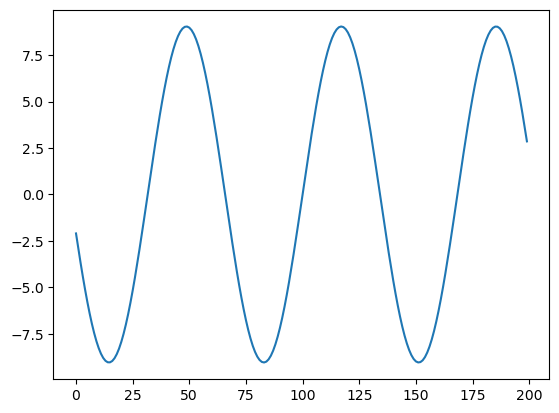

In [115]:
plt.plot(np.arange(200),inverted.real[:200])